# ECON 570 Project

Group member: Yang Wang, Rui Kong, Yuheng Du

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)

# Introduction









## a. Research question

Use different models to predict whether a patient would get Stroke based on his information and select a better one.

## b. Reason to care about the question

Stroke is the second most common cause of death worldwide and is the leading cause of acquired disability in adults. This study explores the data of 5110 subjects. Stroke is predicted mainly by analyzing the gender, age, marital status, living area(rural or urban), living habits (whether or not of smoking) and physical condition (including bmi, hypertension, heart disease and other past diseases) of the research subjects. The results can predict conditions that are more likely to cause strokes, which could be helpful in preventing strokes. This study mainly selected three models for prediction, including Logistic Regression, K Nearest Neighbors and Random Forest. In the process of literature review, we found that many predictions about stroke use logistic regression, and few use knn and random forest for prediction, so the focus of our research is whether other models are more suitable for prediction of stroke-related data. These are the reasons why we chose this research question.

## c. Previous studies

We found the following papers relevant to our research question:

#### 1. “Predictors of in-hospital and 90-day post-discharge stroke mortality in Lusaka, Zambia” (Nutakki et al. 2022, 120249)
This article focuses on predictors of 90-day stroke mortality after hospitalization and discharge in Lusaka, Zambia. The authors performed a retrospective analysis of consecutive adults hospitalized for stroke at the Lusaka University Teaching Hospital in Zambia between October 2018 and March 2019 to obtain clinical hospitalization outcomes. Vital status 90 days after discharge was determined by telephone. Factors associated with stroke mortality were incorporated into a multivariate logistic regression model, and multiple attribution analysis was used to identify independent predictors of in-hospital and 90-day post-discharge mortality. Results of the analysis indicated that older age and aspiration pneumonia were independently associated with 90-day mortality in multivariate analysis.

#### 2. “Comparison of logistic regression and neural networks to predict rehospitalization in patients with stroke”(Ottenbacher et al. 2001, 1159–65)
This article primarily compares logistic regression and neural networks for predicting rehospitalization with a 3- to 6-month follow-up in stroke-recovered discharged patients. The authors examined information submitted to the Unified Data System for Medical Rehabilitation from 167 hospitals and rehabilitation facilities in 40 states in 1997 and 1998. The indicators of readmission at 80 to 180 days after discharge were mainly observed. The variables found to be statistically significant (P < .05) in the logistic model included sphincter control, self-care ability, age, marital status, race, and length of hospital stay. Compared with logistic regression, neural network analysis had no statistically significant or practical advantage in predicting readmissions for patients who experienced stroke and underwent medical rehabilitation during the study period.

# Data 

## a. Data Source





Our data source is https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. This data is a csv dataset of information about different variables to predict Stroke's health. The entire dataset is full of 5110 rows × 12 columns. 

In this data set, the variables include id (completely random number number, specific for each observation), gender (mark the gender of observations, observe the invisible connection between gender and Stroke), age (change through age) , looking for whether the increase in age will affect Stroke), hypertension and heart_disease (judging whether there is a potential connection between hypertension and heart_disease and Stroke according to the history of heart and blood pressure diseases in observations), ever_married, work_type, Residence_type and smoking_status (external factors, such as living habits , the residential area, and the impact it will have on the Stroke), as well as avg_glucose_level and bmi (the linear relationship between the basic physical condition and the existence of the Stroke). Finally, the research variable of this project, the Stroke situation of observatiobs.

In [3]:
data_source = "https://raw.githubusercontent.com/dyy427/Assignment-2/main/healthcare_dataset_stroke_data.csv"
data = pd.read_csv(data_source) #the csv data of healthcare_dataset_stroke_data
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## b. Data Cleaning

In [4]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
data_list = data.drop(['id'], axis=1)

Remove missing values in the column of "bmi" and double check if there are any missing values.

In [6]:
df = data_list.dropna()
print ("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   0


There is one data “Other” in the gender, we want to replace it with female under this situation since it would be too little to affect the whole data set.

In [7]:
df.groupby('gender').sum('stroke')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,
Female,125839.32,251,100,299346.76,84203.5,120
Male,84560.80,200,143,217452.89,57611.0,89
Other,26.00,0,0,143.33,22.4,0


Replace "Other" with "Female"

In [8]:
df['gender'].replace({'Other':'Female'},inplace=True)
df.groupby('gender').sum('stroke')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender,,,,,,
Female,125865.32,251,100,299490.09,84225.9,120
Male,84560.80,200,143,217452.89,57611.0,89


## c. Summary statistics

### Visualization for numerical variables
#### Scatter plot to explore the numerical variables

In [9]:
df_numerical=df[['age','avg_glucose_level','bmi']]
df_categorical=df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                       'smoking_status']]

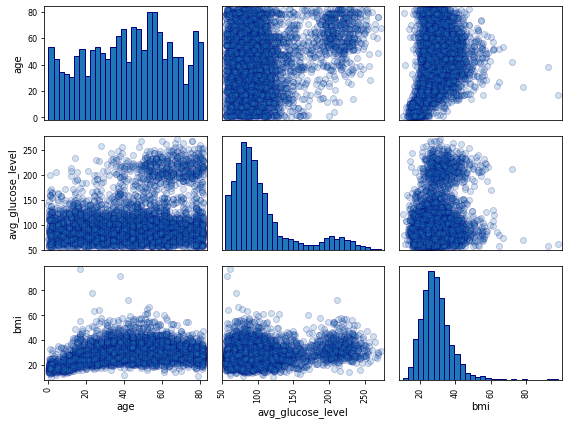

In [10]:
_ = pd.plotting.scatter_matrix(df_numerical,alpha = 0.2, figsize = (8, 6), marker = "o",
                           hist_kwds = dict(edgecolor = "navy", linewidth = 1, bins = 30),
                           edgecolor = "navy")
_ = plt.tight_layout()
plt.show()

From the scatter matrix plot, we could find that the distribution of ages of patients are all above 30 years old, the averagte glucose level are mainly distributed in the range from 50 to 120. the bmi are mostly distributed around 30. 

#### Correlation Matrix

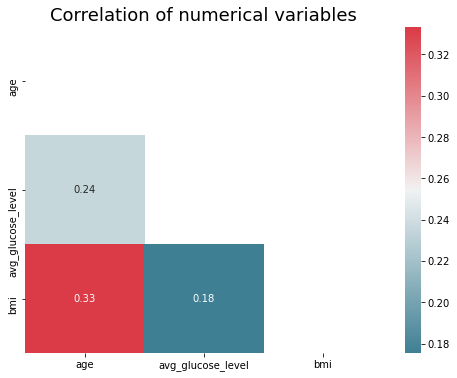

In [11]:
mask = np.zeros_like(df_numerical.corr())
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap = True)

fig = plt.figure(figsize = (8, 6))
_ = plt.title('Correlation of numerical variables', size = 18)
_ = sns.heatmap(df_numerical.corr(), mask = mask, cmap = cmap, annot = True)
_ = plt.ylim((len(df_numerical.corr()), 0)) 
plt.show()

From this heatmap, we could see that bmi has a positive relationship with age, it's 0.33.

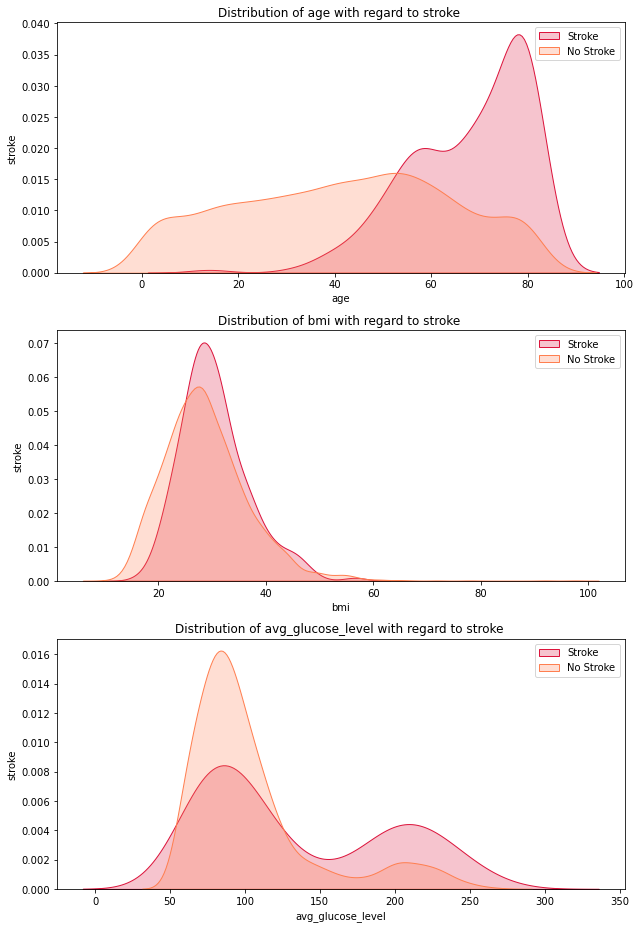

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(9, 13))

plt.subplot(3, 1, 1)
sns.kdeplot(x=df.loc[df['stroke']==1]['age'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(x=df.loc[df['stroke']==0]['age'],color='coral',label='No Stroke',shade=True)
plt.xlabel('age')
plt.ylabel('stroke')
plt.legend(loc='upper right')
plt.title('Distribution of age with regard to stroke ')

plt.subplot(3, 1, 2)
sns.kdeplot(x=df.loc[df['stroke']==1]['bmi'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(x=df.loc[df['stroke']==0]['bmi'],color='coral',label='No Stroke',shade=True)
plt.xlabel('bmi')
plt.ylabel('stroke')
plt.legend(loc='upper right')
plt.title('Distribution of bmi with regard to stroke ')

plt.subplot(3, 1, 3)
sns.kdeplot(x=df.loc[df['stroke']==1]['avg_glucose_level'],color='crimson',label='Stroke',shade=True)
sns.kdeplot(x=df.loc[df['stroke']==0]['avg_glucose_level'],color='coral',label='No Stroke',shade=True)
plt.xlabel('avg_glucose_level')
plt.ylabel('stroke')
plt.legend(loc='upper right')
plt.title('Distribution of avg_glucose_level with regard to stroke ')
fig.tight_layout()

From above figures, we could find that older patients and having higher average glucose level are more likely to have a stroke.

### Visualization for categorical variables
#### Bar chart analysis

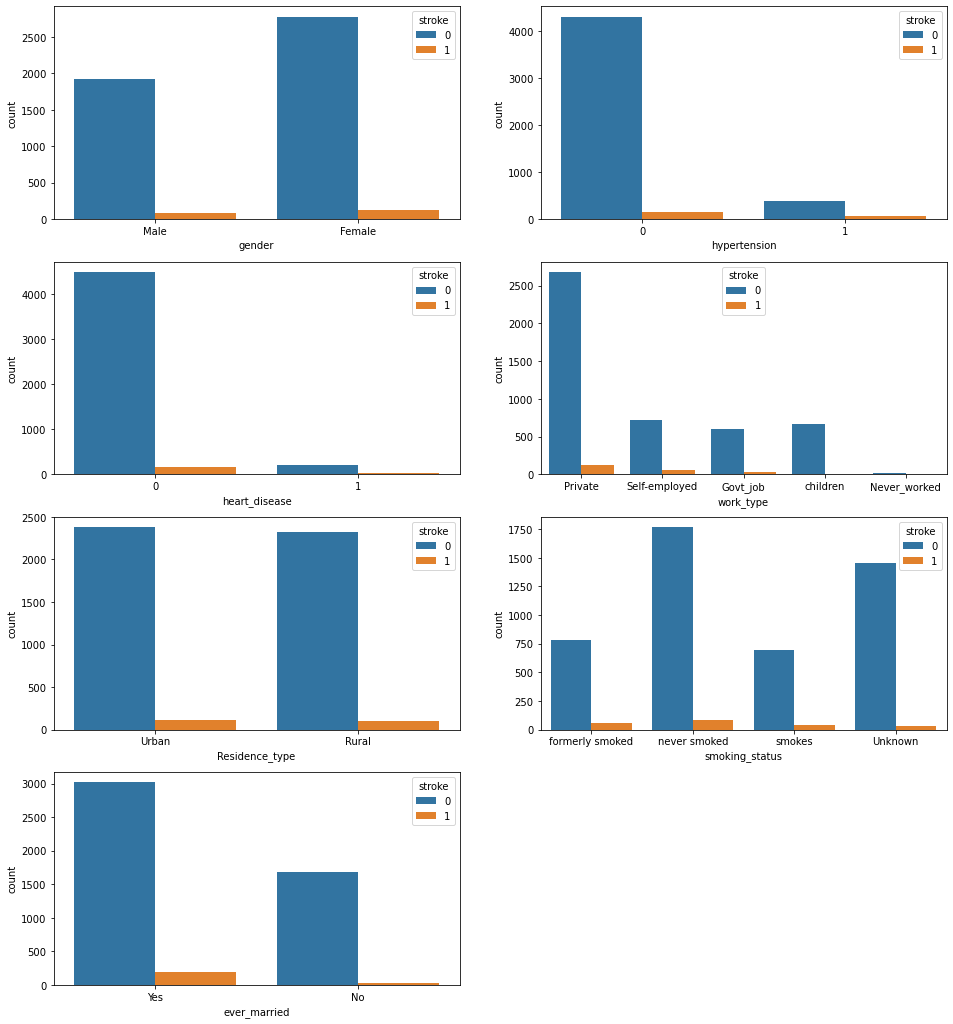

In [13]:
fig, axes = plt.subplots(4, 2, figsize=(16, 18))

plt.subplot(4, 2, 1)
sns.countplot(x=df_categorical['gender'],hue=df['stroke'])
plt.xlabel('gender')
plt.subplot(4, 2, 2)
sns.countplot(x=df_categorical['hypertension'],hue=df['stroke'])
plt.xlabel('hypertension')
plt.subplot(4, 2, 3)
sns.countplot(x=df_categorical['heart_disease'],hue=df['stroke'])
plt.xlabel('heart_disease')
plt.subplot(4, 2, 4)
sns.countplot(x=df_categorical['work_type'],hue=df['stroke'])
plt.xlabel('work_type')
plt.subplot(4, 2, 5)
sns.countplot(x=df_categorical['Residence_type'],hue=df['stroke'])
plt.xlabel('Residence_type')
plt.subplot(4, 2, 6)
sns.countplot(x=df_categorical['smoking_status'],hue=df['stroke'])
plt.xlabel('smoking_status')
plt.subplot(4, 2, 7)
sns.countplot(x=df_categorical['ever_married'],hue=df['stroke'])
plt.xlabel('ever_married')
axes.flat[-1].set_visible(False) 

plt.show()

Handling the column, transfer object variable into float form.

In [14]:
df['gender'] = pd.get_dummies(df['gender'], drop_first=True)
df['ever_married'] = pd.get_dummies(df['ever_married'], drop_first=True)
df['Residence_type'] = pd.get_dummies(df['Residence_type'], drop_first=True)
df['work_type']=df['work_type'].replace(['Self-employed', 'Private', 'Govt_job', 'children', 'Never_worked'],[1,2,3,4,5])
df['smoking_status']=df['smoking_status'].replace(['smokes', 'formerly smoked', 'never smoked', 'Unknown'],[1,2,3,4])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,3,1
3,0,49.0,0,0,1,2,1,171.23,34.4,1,1
4,0,79.0,1,0,1,1,0,174.12,24.0,3,1
5,1,81.0,0,0,1,2,1,186.21,29.0,2,1


In [15]:
y = df.stroke.values
x = df.drop(['stroke'], axis = 1)

# Model Analysis

## Logistic Regression

In [16]:
# Split x and y into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [17]:
# Scale Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [18]:
# Create a Model and Train It
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

In [19]:
# Evaluate the Model
x_test = scaler.transform(x_test)

In [20]:
y_pred = logreg.predict(x_test)

In [21]:
logreg.score(x_train, y_train)

0.9570768812822602

In [22]:
logreg.score(x_test, y_test)

0.9600977198697068

In [23]:
# Make confusion matrix
confusion_matrix(y_test, y_pred)

array([[1179,    0],
       [  49,    0]])

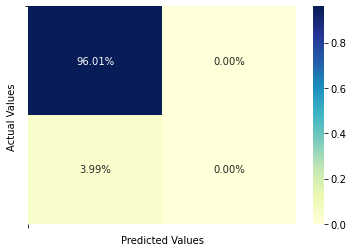

0.9600977198697068

In [24]:
cm = confusion_matrix(y_test, y_pred)
cm_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm_matrix/np.sum(cm_matrix), annot=True, 
            fmt='.2%', cmap='YlGnBu')

ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set(ticks=range(1))
ax.yaxis.set(ticks=range(1))

plt.show()
accuracy_score(y_test, y_pred)

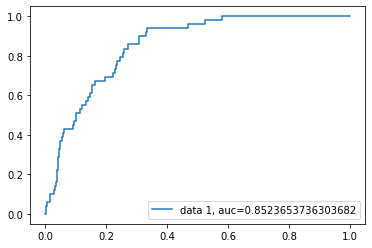

In [25]:
# Make ROC Curve
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## K Nearest Neighbors

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
y_pred=classifier.predict(x_test)

In [30]:
n = 25
df = pd.DataFrame.from_dict({
    'x1':np.random.normal(0,1,n),
    'x2':np.random.normal(1,4,n),
    'x3':np.random.normal(1,0,n),
    'y':np.random.binomial(1,0.5,n)
})

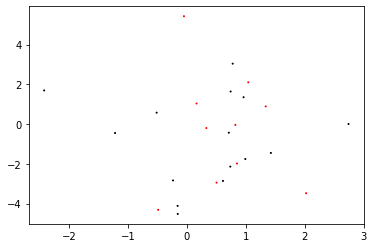

In [31]:
#plot of neighbor
colorDict = {0:'black',1:'red'}
for i in [0,1]:
    plt.scatter(df[df.y==i].x1,df[df.y==i].x2,df[df.y==i].x3,color = colorDict[i])

In [32]:
#Calculate Euclidean distance
def euclidean_distance(p1,p2):
    return np.linalg.norm(p1-p2)

In [33]:
dist = np.linalg.norm(np.array([1,1]) - np.array([0,0]))

In [34]:
p1 = np.array([1,1])
p2 = np.array([0,0])

In [35]:
n = 25
df_test = pd.DataFrame.from_dict({
    'x1':np.random.normal(0,1,n),
    'x2':np.random.normal(4,2,n),
    'x3':np.random.normal(1,0,n)
})

In [36]:
p_test = np.array([df_test.x1[0],df_test.x2[0],df_test.x3[0]])

In [37]:
#test data
p_test = np.array([df_test.x1[0],df_test.x2[0],df_test.x3[0]])

In [38]:
p_test

array([1.5427428 , 3.81989169, 1.        ])

In [39]:
pNeighbors = {}
for idx, row in df.iterrows():
    p = np.array([df.x1[idx],df.x2[idx],df.x3[idx]])
    dist = euclidean_distance(p_test,p)
    pNeighbors[idx] = (dist,df.y[idx])

In [40]:
k = 5
distances = [i[0] for i in pNeighbors.values()]
idx = np.argsort(distances)[:k]
idx

array([ 5,  6, 23,  0, 10])

In [41]:
[pNeighbors[i][1] for i in idx]

[0, 1, 1, 0, 0]

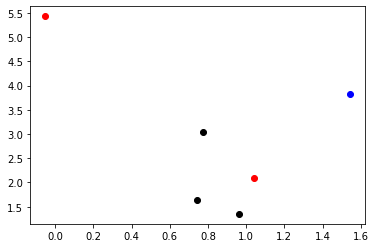

In [42]:
# pNeighbors
colorDict = {0:'black',1:'red'}
for i in idx:
    plt.scatter(df.iloc[i].x1,df.iloc[i].x2,color = colorDict[df.iloc[i].y])
plt.scatter(df_test.iloc[0].x1,df_test.iloc[0].x2, color = 'blue')

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1172
           1       0.29      0.04      0.06        56

    accuracy                           0.95      1228
   macro avg       0.62      0.52      0.52      1228
weighted avg       0.93      0.95      0.93      1228

[[1167    5]
 [  54    2]]


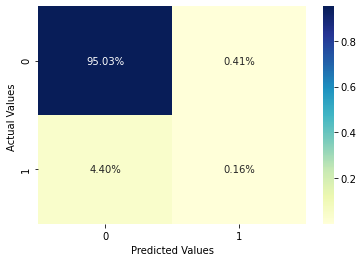

0.9519543973941368

In [44]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='YlGnBu')

ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()
accuracy_score(y_test, y_pred)

# Random Forest

In [45]:
# Split x and y into training and testing sets
np.random.seed(6)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [46]:
len(x_train)

3681

In [47]:
# Scale Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [48]:
# Create a Model and Train It
model = RandomForestClassifier(n_estimators = 25, criterion = 'gini', random_state = 0)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=0)

In [49]:
# Evaluate the Model
model.score(x_test,y_test)

0.9560260586319218

### Makeing a confusion Matrix

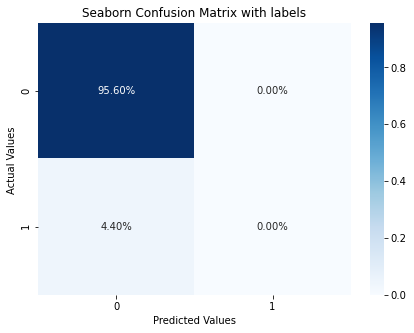

0.9560260586319218

In [50]:
plt.figure(figsize = (7,5))
y_pred = model.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

plt.show()

accuracy_score(y_test, y_pred)

# Findings 

For the Logistic regression, it describes and estimates the relationship between one dependent binary variable and independent variables. Because our dependent variable--Stroke is a binary variable, which only contains 0 and 1, the logistic regression is a good choice. From the logistic regression result we can see that the accuracy score of the regression model is 96%, which indicates that this set of data performs well in logistic regression. And from the ROC curve we can see that the AUC score is 0.85, which represents good classifier of this model.

K-Nearest Neighbour is a supervised machine learning algorithm. KNN is often used to solve classification and regression problem statements. It works by finding the distance between the query and all the examples in the data, choosing the specified number of examples that are closest to the query. That is to say, KNN can evaluate the potential distance relationship between variables. There are ten explanatory variables in this study, so KNN is a very good research method to analyze the relationship between variables. In the study, it can also be found that KNN has an accuracy score of 95%, which represents that this model is well suited for the study of this set of data.

For the Random Forest, it's supervised Machine Learning Algorithm that is used widely in Classification and Regression by building decision trees on different samples and takes their majority vote for classification and average in case of regression. Based on our data set, there are eight categorical variables, so using random forest is a really convenient approach to predict a dummy variable "stroke". Also the accuracy score of Random Forest is 95.6%, which indicates it performs well on this set of data.

The regressions of the above three models are all robust.

# Conclusion

### a. What we’ve learned from your analysis.

For the prediction of "Stroke" based on this set of data, we have three models that including Logistic regression, KNN and Random Forest which are all performed well, and the accuracy score of those models all reached more than 95%. Therefore, these results show that these three models are good choices for the case that dependent variable is binary variable and in the real situation, we could use one of three models to predict whether the patient would get stroke based on his basic information and medical records.

### b.  Questions that could be answered in the future

In this study, we can also get the probabilities of the predicted stroke being equal to one by analyzing regression results through logistic regression. Meanwhile, we can also get the influence of each explanatory variable on stroke by analyzing the parameters of each explanatory variable in the regression results.
Besides, Logistic regression can be used in many ways to help predict the probability of event occurrence. For example, it can be used in cancer detection problem to predict the possibility of cancer occurrence and the influencing factors. And it can be used to explore whether a high school student will be admitted or not to a particular college.

In addition to the Medical field involved in this research, K-Nearest Neighbour still plays a very important role in research in many fields. For example, KNN is a common research method in the financial field, because it can predict the stock market trend, such as predicting the company's stock price based on the company's revenue trend and economic data, as well as the exchange rate trend between different countries. Beyond that, Agriculture often relies on KNN research. For example, KNN can classify historical data through the analysis of historical data sets (such as precipitation, temperature) and predict future data patterns.


What's more, Random Forest is also used in many real cases. For example, it can be applied in the financial field, like to evaluate customers with high credit risk, to detect fraud, and option pricing problems. Also it could be used in biological industry, for instanse, the gene expression classification. Or it could be used in studying the classification of quality of wine.More importantly, it can be applied to model marketing simulations, obtain optimal product recommendations by calculating customer purchases, retention and loss of flow.